In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

The start date for the last year of data is 2016-08-24


Text(0.5, 0, 'Date')

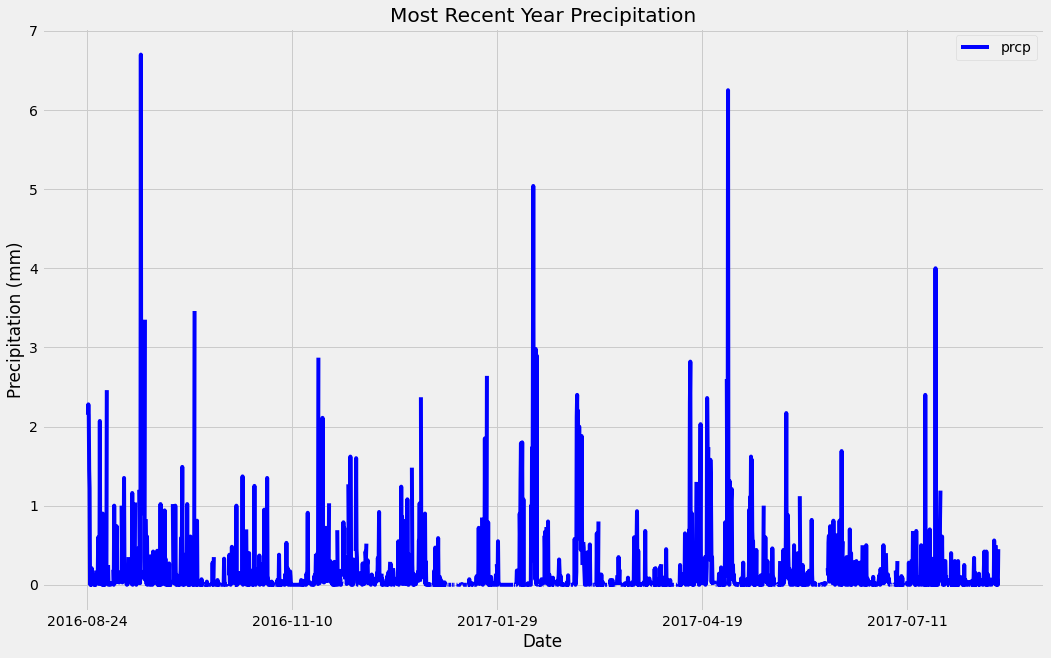

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
lastyear_startdate = (dt.datetime.strptime(recent_date[0],'%Y-%m-%d') - dt.timedelta(days=364)).strftime('%Y-%m-%d')
print(f'The start date for the last year of data is {lastyear_startdate}')

# Perform a query to retrieve the data and precipitation scores
date_and_precipitation = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= lastyear_startdate).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
date_and_precipitation_df = pd.DataFrame(date_and_precipitation)

# Sort the dataframe by date
date_and_precipitation_df.set_index('date', inplace=True)
d_p_sort = date_and_precipitation_df.sort_index()
d_p_sort.head(20)

# Use Pandas Plotting with Matplotlib to plot the data
d_p_sort.plot(color="blue", figsize=(16, 10))
plt.title("Most Recent Year Precipitation")
plt.ylabel("Precipitation (mm)")
plt.xlabel("Date")

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stats = d_p_sort['prcp'].describe()
print(summary_stats)

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station.station).count()
print(total_stations)

9


In [28]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.date)).\
group_by(measurement.station).order_by(func.count(measurement.date).desc()).all()

most_active_station = session.query(measurement.station, func.count(measurement.date)).\
group_by(measurement.station).order_by(func.count(measurement.date).desc()).first()

most_active_station_df = pd.DataFrame(most_active_station)
most_active_station_id = most_active_station[0]
most_active_station_id

'USC00519281'

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_most_active = session.query(func.min(measurement.tobs)).filter(measurement.station == most_active_station_id).scalar()
print(lowest_most_active)

highest_most_active = session.query(func.max(measurement.tobs)).filter(measurement.station == most_active_station_id).scalar()
print(highest_most_active)

avg_most_active = session.query(func.avg(measurement.tobs)).filter(measurement.station == most_active_station_id).scalar()
print(avg_most_active)

54.0
85.0
71.66378066378067


Text(0.5, 0, 'Temperature')

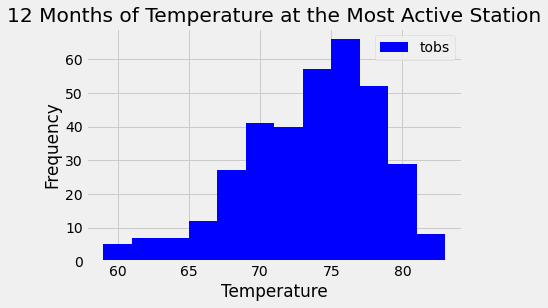

In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_data = session.query(measurement.tobs).filter(measurement.date >= lastyear_startdate, measurement.station == most_active_station_id).all()
year_data_df = pd.DataFrame(year_data)
year_data_df

year_data_df.plot.hist(bins = 12, color='blue')
plt.title("12 Months of Temperature at the Most Active Station")
plt.xlabel("Temperature")

# Close session

In [16]:
# Close Session
session.close()